In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [13]:
len(y_train)

60000

In [5]:
len(X_test)

10000

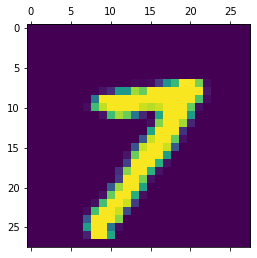

In [10]:
plt.matshow(X_train[40000])

In [18]:
X_train.shape

(60000, 28, 28)

In [29]:
X_train = X_train / 255
X_test = X_test / 255

In [30]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [31]:
X_train_flattened.shape

(60000, 784)

In [33]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train_flattened,y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 806us/step - loss: 0.4895 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 2s 901us/step - loss: 0.3062 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 2s 906us/step - loss: 0.2854 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 2s 893us/step - loss: 0.2750 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 2s 881us/step - loss: 0.2679 - accuracy: 0.9266


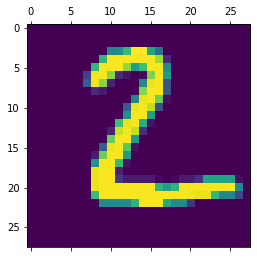

In [46]:
plt.matshow(X_test[1])

In [61]:
y_pred = model.predict(X_test_flattened)
y_pred[0]

array([1.4123543e-07, 5.0158331e-09, 3.0979514e-04, 2.8419495e-04,
       5.5598259e-11, 7.4567147e-08, 1.4676484e-11, 8.8260490e-01,
       8.3223637e-07, 9.1773672e-06], dtype=float32)

In [62]:
np.argmax(y_pred[1])

2

In [63]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [64]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    1,    3,    1,    1,    0,    1,    2,    0],
       [   0, 1126,    4,    2,    0,    1,    1,    0,    1,    0],
       [   3,    0, 1011,    1,    3,    0,    1,    5,    7,    1],
       [   0,    1,    1,  995,    1,    1,    0,    4,    3,    4],
       [   2,    0,    9,    0,  948,    0,    3,    1,    2,   17],
       [   3,    0,    0,   21,    2,  856,    2,    1,    5,    2],
       [   6,    4,    3,    2,    5,    7,  928,    1,    2,    0],
       [   2,    5,    8,    0,    0,    0,    0, 1002,    4,    7],
       [   5,    1,    6,    8,    3,    4,    1,    5,  939,    2],
       [   2,    4,    0,    6,    5,    1,    0,    6,    2,  983]])>

Text(69.0, 0.5, 'Truth')

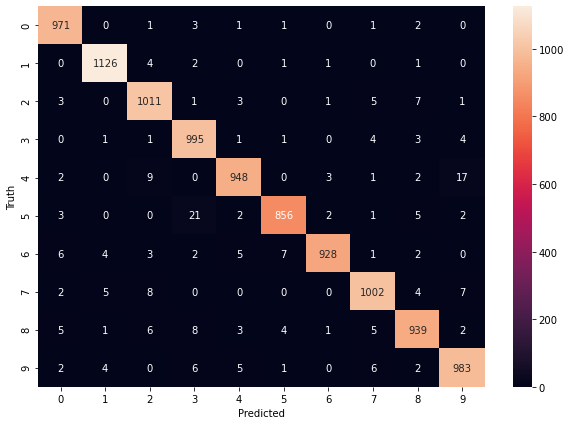

In [65]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [59]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train_flattened,y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2879 - accuracy: 0.9197
Epoch 2/5
1875/1875 [==============================] - 2s 865us/step - loss: 0.1301 - accuracy: 0.9626
Epoch 3/5
1875/1875 [==============================] - 2s 871us/step - loss: 0.0926 - accuracy: 0.9725
Epoch 4/5
1875/1875 [==============================] - 2s 863us/step - loss: 0.0697 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 2s 866us/step - loss: 0.0577 - accuracy: 0.9826


In [60]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 767us/step - loss: 0.0800 - accuracy: 0.9759


[0.08002924174070358, 0.9758999943733215]

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train,y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2947 - accuracy: 0.9171
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1318 - accuracy: 0.9612
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0956 - accuracy: 0.9711
Epoch 4/5
1304/1875 [===================>..........] - ETA: 0s - loss: 0.0716 - accuracy: 0.9784